##Improt Libraries Yang diperlukan

In [7]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns  #Python library for Vidualization

#From Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

##Load Data Customer Mall

In [8]:
#Load Data Customer Personality Analysis
data = pd.read_csv('/content/Mall_Customers.csv')
#Lihat 5 baris pertama data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##Melihat Info Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
dropdata = 'CustomerID'
databaru = data.drop(dropdata, axis=1)
databaru.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [11]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [12]:
#Encode atau Permisalan pada data Gender
encode = databaru['Gender'].unique()
pemetaan = {nilai: urutan for urutan, nilai in enumerate(encode, start=1)}
databaru['Gender'] = databaru['Gender'].map(pemetaan)

#Lihat 5 baris pertama data
databaru.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


In [13]:
print(databaru.shape)

(200, 4)


In [14]:
#Lihat statistik data
databaru.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,1.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,1.000000,28.750000,41.500000,34.750000
50%,2.000000,36.000000,61.500000,50.000000
75%,2.000000,49.000000,78.000000,73.000000
max,2.000000,70.000000,137.000000,99.000000


In [15]:
databaru.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [16]:
missing_value = databaru.isnull().sum()
missing_value

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
print(databaru[databaru.duplicated(keep=False)])

Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [18]:
#List nama feature
nama_kolom = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [19]:
#Standarisasi feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(databaru)

stardardized_data = pd.DataFrame(standardized, columns = nama_kolom)
stardardized_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


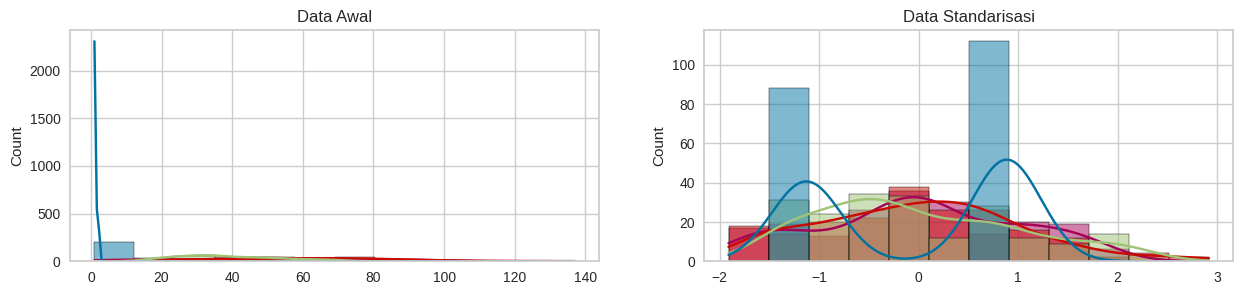

In [20]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(databaru, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Data Awal")
sns.histplot(stardardized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Data Standarisasi")
plt.show()

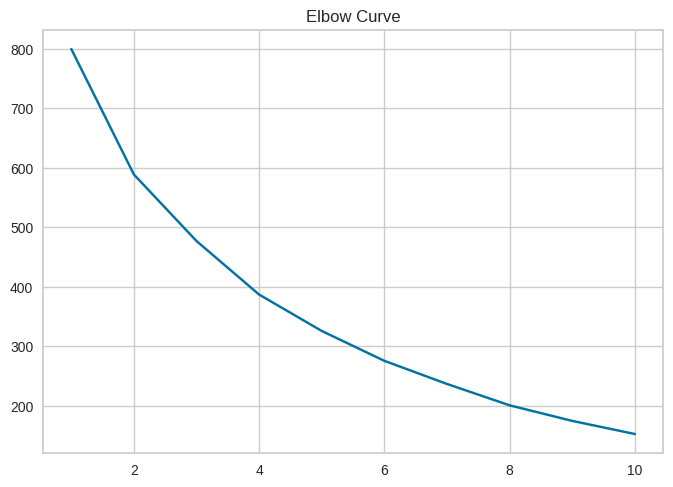

In [21]:
X = stardardized_data
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

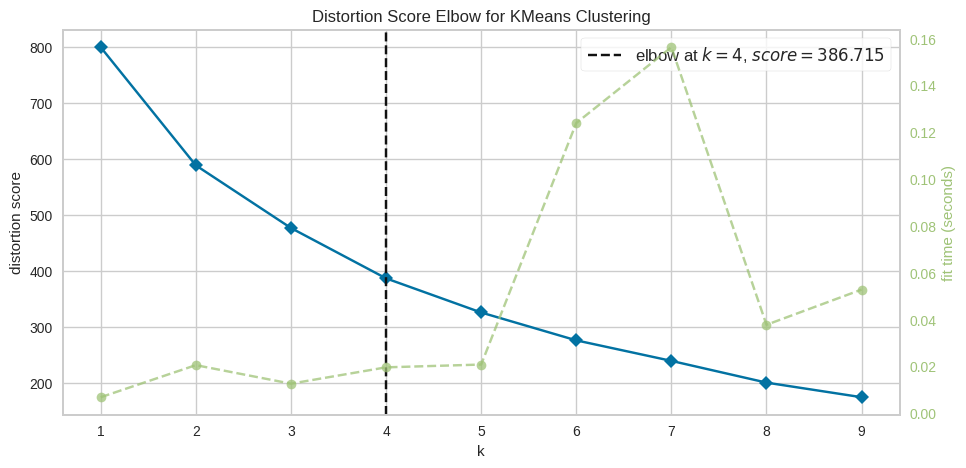

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500),)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [23]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++',random_state=42)
kmeans.fit(X)

# Now, print the silhouette score of this model

print("silhouette_score is :",silhouette_score(X, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.3016237438985174


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


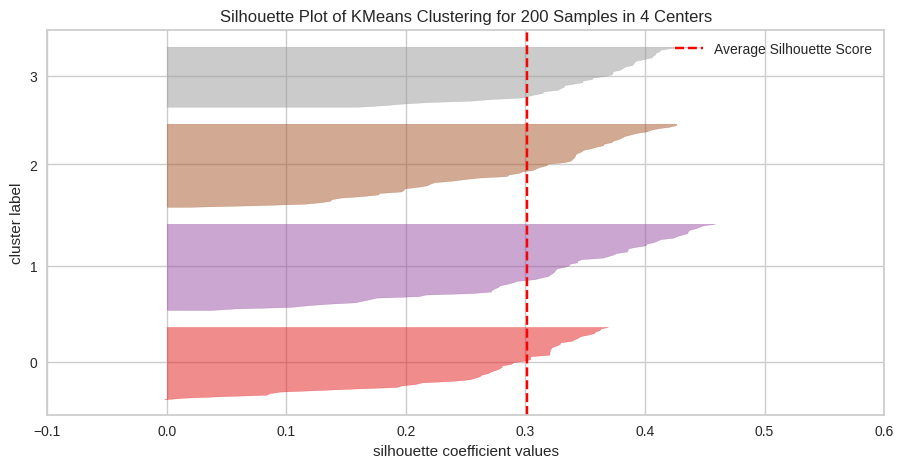

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans1 = KMeans(n_clusters = 4, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(kmeans1,size=(1080, 500))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [67]:
clusters = kmeans.fit_predict(X.iloc[:,1:])
X["label"] = clusters
X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,-1.128152,-1.424569,-1.738999,-0.434801,3
1,-1.128152,-1.281035,-1.738999,1.195704,3
2,0.886405,-1.352802,-1.700830,-1.715913,3
3,0.886405,-1.137502,-1.700830,1.040418,3
4,0.886405,-0.563369,-1.662660,-0.395980,3


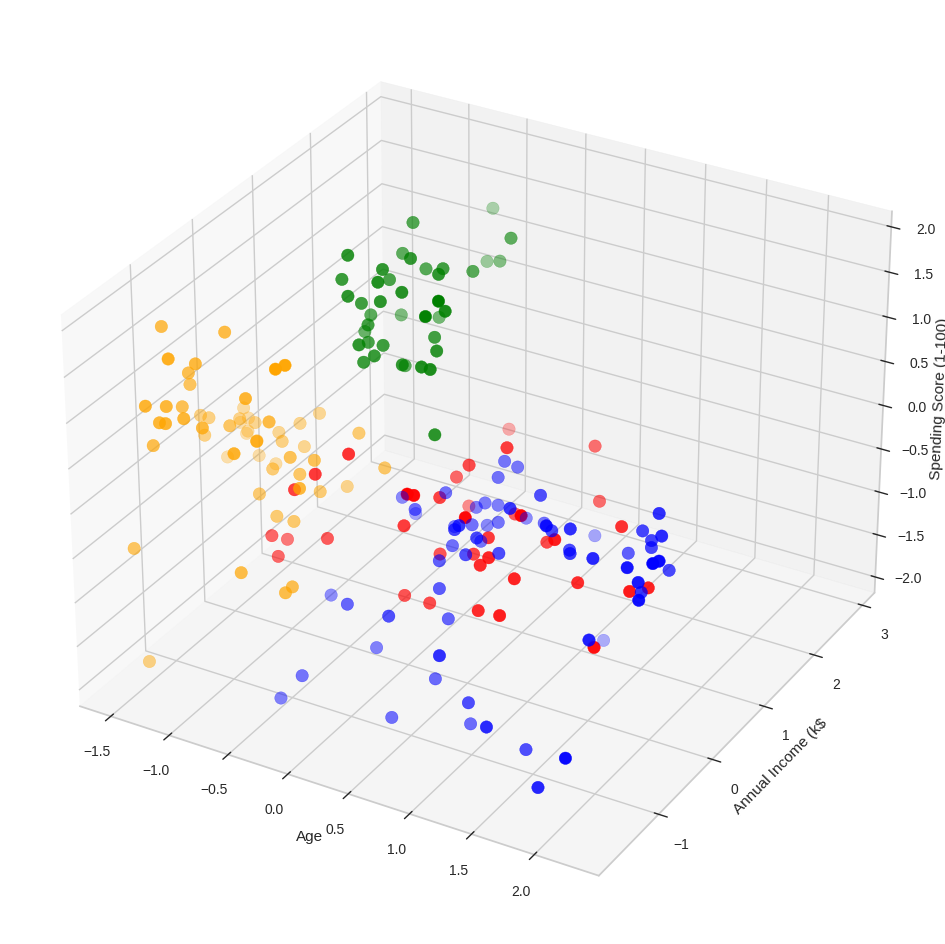

In [68]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.Age[X["label"] == 0], X["Annual Income (k$)"][X["label"] == 0], X["Spending Score (1-100)"][X["label"] == 0], c='blue', s=80)
ax.scatter(X.Age[X["label"] == 1], X["Annual Income (k$)"][X["label"] == 1], X["Spending Score (1-100)"][X["label"] == 1], c='red', s=80)
ax.scatter(X.Age[X["label"] == 2], X["Annual Income (k$)"][X["label"] == 2], X["Spending Score (1-100)"][X["label"] == 2], c='green', s=80)
ax.scatter(X.Age[X["label"] == 3], X["Annual Income (k$)"][X["label"] == 3], X["Spending Score (1-100)"][X["label"] == 3], c='orange', s=80)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

In [69]:
# Silhouette score
silhouette_avg = silhouette_score(PCA_components, model.labels_, metric='euclidean')
print("Silhouette Score is:", silhouette_avg)


Silhouette Score is: 0.5318703352526056


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



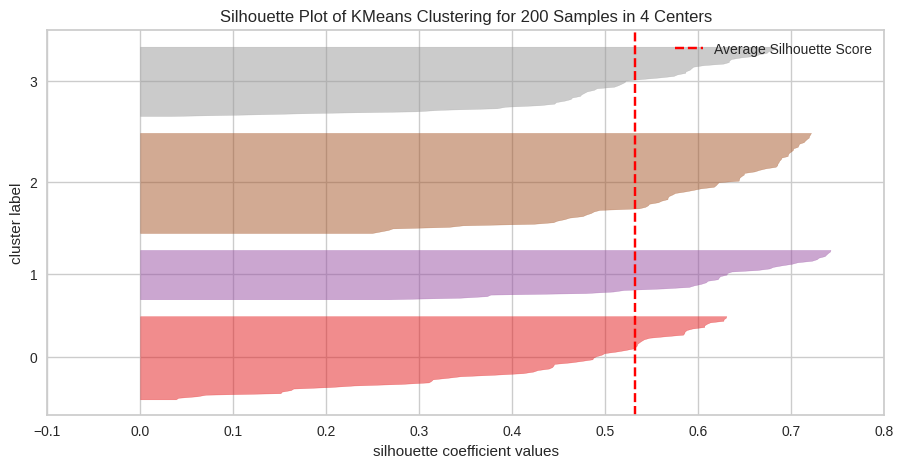

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [70]:
model1 = KMeans(n_clusters = 4, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(model1,size=(1080, 500))
visualizer.fit(PCA_components[:,:2])    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure)    # Fit the data to the visualizer

In [72]:
kmeans = KMeans(n_clusters = 4)
clusters = kmeans.fit_predict(X)
X['label'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [74]:
fig = px.scatter_3d(X, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = 'label', size = 'label')
fig.show()